# Working with REMO domains

The domain module should give some tools to work with preconfigured or user defined domains. Domains are defined as xarray datasets that will contain dimensions and coodinates according to CF-conventions. The pyremo domain module actually uses the [py-cordex](https://py-cordex.readthedocs.io/en/latest/domains.html) domains module in the background just with another set of tables.

**NOTE**: Please be aware that a remo domain is usually a little larger than the “official” cordex domain according to the [archive specification](https://is-enes-data.github.io/cordex_archive_specifications.pdf) since the regional model usually accounts for a “buffer” zone where the lateral boundary conditions are nudged.

## Working with domain information

In [18]:
from pyremo import domain as dm

The domain module contains some useful functions to work with cordex meta data, e.g., you can get some domain grid information using

In [19]:
dm.domain_info('EUR-11')

{'short_name': 'EUR-11',
 'region': 4,
 'long_name': 'Remo Europe high-res.',
 'nlon': 433,
 'nlat': 433,
 'll_lon': -28.925,
 'll_lat': -23.925,
 'dlon': 0.11,
 'dlat': 0.11,
 'pollon': -162.0,
 'pollat': 39.25,
 'ur_lon': nan,
 'ur_lat': nan}

The domain information is stored in a number of csv tables. The module contains a tables dictionary that sorts the tables by resolution or project, e.g.

In [20]:
dm.tables.keys()

dict_keys(['cordex', 'aux', 'cordex-fps'])

All available cordex domains are in those tables:

In [21]:
import pandas as pd
pd.concat(dm.tables.values())

,region,long_name,nlon,nlat,ll_lon,ll_lat,dlon,dlat,pollon,pollat,ur_lon,ur_lat
short_name,,,,,,,,,,,,
AFR-11,5,Remo Africa,801,865,-26.23500,-49.33500,0.1100,0.1100,180.00,90.00,NaN,NaN
AFR-22,5,Remo Africa,401,433,-26.29000,-49.39000,0.2200,0.2200,180.00,90.00,NaN,NaN
AFR-44,5,Remo Africa,217,217,-29.92000,-49.28000,0.4400,0.4400,180.00,90.00,NaN,NaN
AUS-11,9,Remo Australasia,811,541,321.49000,-60.20000,0.1100,0.1100,141.38,60.31,NaN,NaN
AUS-22,9,Remo Australasia,433,271,138.31000,-24.53000,0.2200,0.2200,141.38,60.31,NaN,NaN
AUS-44,9,Remo Australasia,217,145,321.82000,-59.87000,0.4400,0.4400,141.38,60.31,NaN,NaN
CAM-11,2,Remo Central America,865,481,294.09000,-75.63000,0.1100,0.1100,113.98,75.74,NaN,NaN
CAM-22,2,Remo Central America,433,241,-54.45000,-30.47000,0.2200,0.2200,113.98,75.74,NaN,NaN
CAM-44,2,Remo Central America,241,129,-59.84000,-32.12000,0.4400,0.4400,113.98,75.74,NaN,NaN


## `EUR-11` example

The heart of the module are some functions that create a dataset from the grid information, e.g.

In [22]:
eur11 = dm.remo_domain('EUR-11', dummy='topo')
eur11

<xarray.Dataset>
Dimensions:                     (rlat: 433, rlon: 433)
Coordinates:
  * rlon                        (rlon) float64 -28.93 -28.82 ... 18.49 18.6
  * rlat                        (rlat) float64 -23.93 -23.82 ... 23.49 23.6
    lon                         (rlat, rlon) float64 -10.32 -10.23 ... 68.65
    lat                         (rlat, rlon) float64 21.28 21.32 ... 67.86 67.8
Data variables:
    rotated_latitude_longitude  int32 0
    topo                        (rlat, rlon) float32 ...

The `dummy='topo'` argument means, we want a dummy variable in the dataset to see how the domain looks like. For the dummy topography, we use the `cdo topo` operator in the background. So maybe you have to install `python-cdo`, e.g., `conda install -c conda-forge python-cdo`. Working with xarray datasets means, that we can use all the nice functions of xarray including plotting, e.g.,

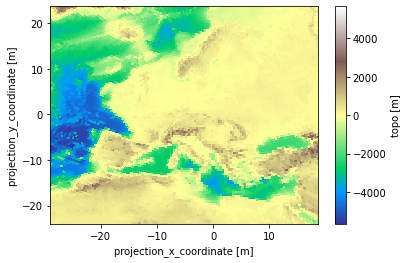

In [23]:
eur11.topo.plot(cmap='terrain')

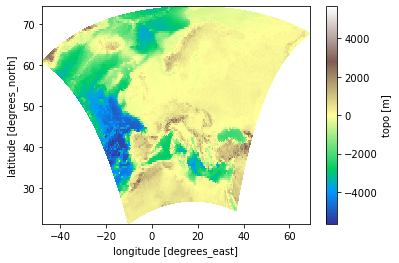

In [24]:
eur11.topo.plot(x='lon', y='lat', cmap='terrain')

Let's define a slightly more sophisticated plotting function that uses cartopy for the right [projection](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html) with a rotated pole:

In [25]:
def plot(da, pole, vmin=None, vmax=None, borders=True, title=''):
    """plot a domain using the right projection with cartopy"""
    %matplotlib inline
    import cartopy.crs as ccrs
    import cartopy.feature as cf
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,10))
    projection = ccrs.PlateCarree()
    transform = ccrs.RotatedPole(pole_latitude=pole[1], pole_longitude=pole[0])
    #ax = plt.axes(projection=projection)
    ax = plt.axes(projection=transform)
    #ax.set_extent([ds_sub.rlon.min(), ds_sub.rlon.max(), ds_sub.rlat.min(), ds_sub.rlat.max()], crs=transform)
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', 
                      xlocs=range(-180,180,10), ylocs=range(-90,90,5))
    da.plot(ax=ax, cmap='terrain', transform=transform, vmin=vmin, vmax=vmax, x='rlon', y='rlat')
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    if borders: ax.add_feature(cf.BORDERS)
    ax.set_title('')

In [26]:
pole = eur11.rotated_latitude_longitude.grid_north_pole_longitude, eur11.rotated_latitude_longitude.grid_north_pole_latitude
pole

(-162.0, 39.25)

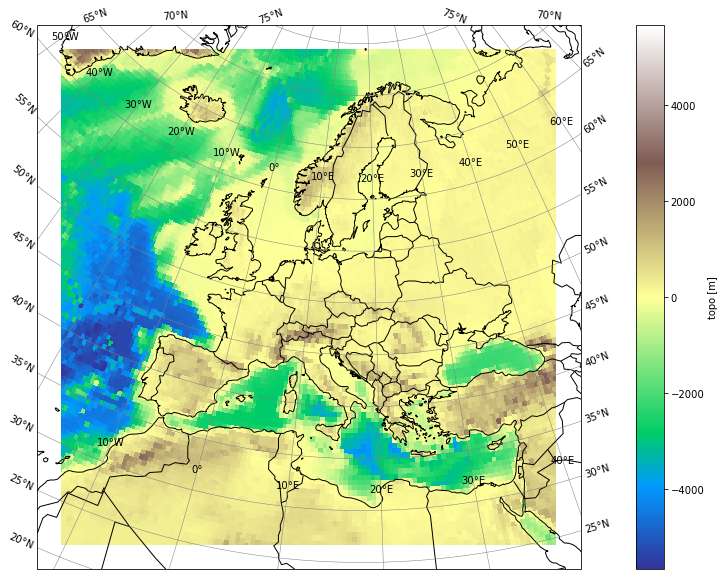

In [27]:
plot(eur11.topo, pole)

## User defined domain

The domains are actually created from csv tables. To checkout the tables you can have a look at `dm.TABLES`. This is a dictionary of dataframes created during the import of the model from a number of csv tables that define standard cordex domains. E.g., available tables are:

In [12]:
dm.tables['cordex']

,region,long_name,nlon,nlat,ll_lon,ll_lat,dlon,dlat,pollon,pollat
short_name,,,,,,,,,,
AFR-11,5,Remo Africa,801,865,-26.235,-49.335,0.11,0.11,180.00,90.00
AFR-22,5,Remo Africa,401,433,-26.290,-49.390,0.22,0.22,180.00,90.00
AFR-44,5,Remo Africa,217,217,-29.920,-49.280,0.44,0.44,180.00,90.00
AUS-11,9,Remo Australasia,811,541,321.490,-60.200,0.11,0.11,141.38,60.31
AUS-22,9,Remo Australasia,433,271,138.310,-24.530,0.22,0.22,141.38,60.31
AUS-44,9,Remo Australasia,217,145,321.820,-59.870,0.44,0.44,141.38,60.31
CAM-11,2,Remo Central America,865,481,294.090,-75.630,0.11,0.11,113.98,75.74
CAM-22,2,Remo Central America,433,241,-54.450,-30.470,0.22,0.22,113.98,75.74
CAM-44,2,Remo Central America,241,129,-59.840,-32.120,0.44,0.44,113.98,75.74


The domains are created using the `create_dataset` function from the [`py-cordex`](https://py-cordex.readthedocs.io) package, e.g.:

In [13]:
from cordex.domain import create_dataset

Let's create the EUR-11 domain manually from the numbers in the table:

In [14]:
eur11_user = create_dataset(nlon=433, nlat=433, dlon=0.11, dlat=0.11, ll_lon=-28.925, ll_lat=-23.925, pollon=-162.00, pollat=39.25, dummy='topo')

We can check that this gives the same result as our preconfigured domain.

In [15]:
eur11_user.equals(eur11)

True

You can now use the `create_dataset` function to create any domain as an xarray dataset.

## Check out the Africa domain!

In [19]:
afr11 = dm.remo_domain('AFR-11', dummy='topo')
afr11

<xarray.Dataset>
Dimensions:                     (rlat: 865, rlon: 801)
Coordinates:
  * rlon                        (rlon) float64 -26.23 -26.12 ... 61.66 61.77
  * rlat                        (rlat) float64 -49.34 -49.23 ... 45.6 45.71
    lon                         (rlat, rlon) float64 -26.24 -26.13 ... 61.76
    lat                         (rlat, rlon) float64 -49.34 -49.34 ... 45.71
Data variables:
    rotated_latitude_longitude  int32 0
    topo                        (rlat, rlon) float32 ...

In [20]:
pole = afr11.rotated_latitude_longitude.grid_north_pole_longitude, afr11.rotated_latitude_longitude.grid_north_pole_latitude
pole

(180.0, 90.0)

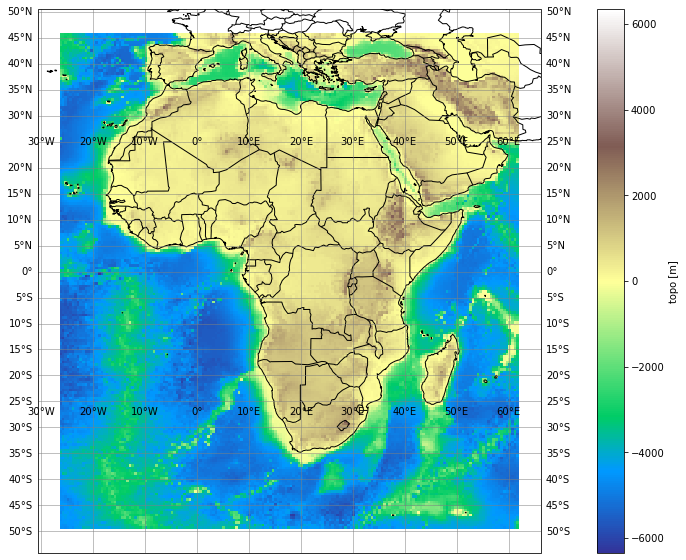

In [21]:
plot(afr11.topo, pole)

## Plot all cordex-core domains

We need a slightly modified plotting routine for this:

In [22]:
def plots(dsets, vmin=None, vmax=None, borders=True, title=''):
    """plot a domain using the right projection with cartopy"""
    %matplotlib inline
    import cartopy.crs as ccrs
    import cartopy.feature as cf
    import matplotlib.pyplot as plt
    import matplotlib.patheffects as pe
    plt.figure(figsize=(20,10))
    projection = ccrs.PlateCarree()
    #transform = ccrs.RotatedPole(pole_latitude=pole[1], pole_longitude=pole[0])
    #ax = plt.axes(projection=projection)
    ax = plt.axes(projection=projection)
    #ax.set_extent([ds_sub.rlon.min(), ds_sub.rlon.max(), ds_sub.rlat.min(), ds_sub.rlat.max()], crs=transform)
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', 
                      xlocs=range(-180,180,15), ylocs=range(-90,90,10))
    #path_effects = [pe.Stroke(linewidth=50, foreground='g'), pe.Normal()]
    for ds in dsets:
        pole = ds.rotated_latitude_longitude.grid_north_pole_longitude, ds.rotated_latitude_longitude.grid_north_pole_latitude
        transform = ccrs.RotatedPole(pole_latitude=pole[1], pole_longitude=pole[0])
        ds.topo.plot(ax=ax, cmap='terrain', transform=transform, vmin=vmin, vmax=vmax, 
                     x='rlon', y='rlat', add_colorbar=False)
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    if borders: ax.add_feature(cf.BORDERS)
    ax.set_title('')

Now, let's plot all cordex core domains into one overview:

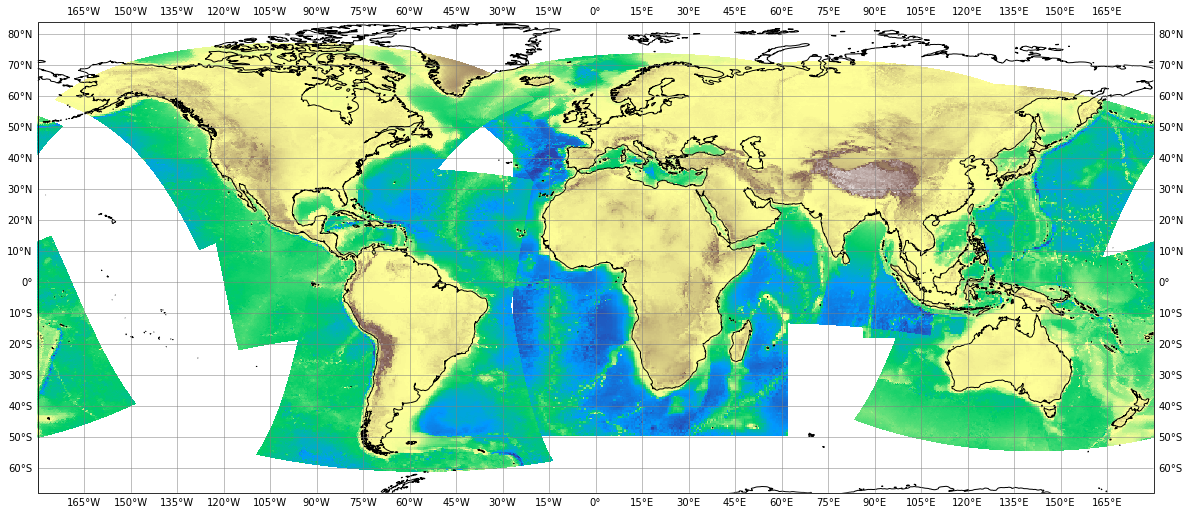

In [23]:
plots([dm.remo_domain(name, dummy='topo') for name in dm.tables['cordex'].index if "22" in name], borders=False)

## Cropping the REMO domain

Sometimes it might be neccessary to crop the REMO data to the official CORDEX grid size, e.g., for cmorization. This can now easily be done like this:

In [82]:
from cordex.domain import cordex_domain
import numpy as np
eur11_cordex = cordex_domain('EUR-11', dummy='topo')

In [112]:
#crop = eur11.sel(rlon=slice(eur11_cordex.rlon.min(), eur11_cordex.rlon.max()), rlat=slice(eur11_cordex.rlat.min(), eur11_cordex.rlat.max()))
crop = eur11.sel(rlon=eur11_cordex.rlon, rlat=eur11_cordex.rlat, method='nearest')

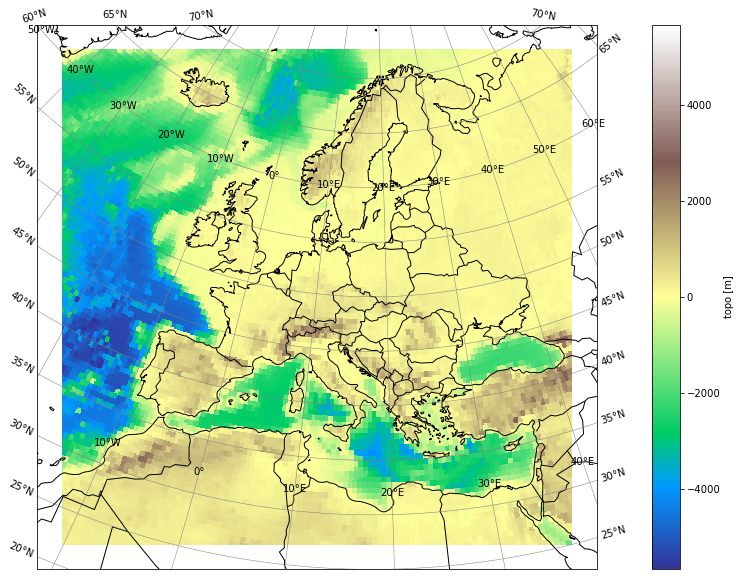

In [104]:
plot(crop.topo, pole)